# supereeg demonstration

The faceshouses dataset includes observations for a basic task from fourteen patients and observations for a noisy task from seven of them. In this notebook four models will be made:

1. The basic observations of the seven patients who have noisy observations
2. All fourteen patients who have basic observations
3. The basic and noisy observations from the seven patients
4. All observations

In [1]:
import supereeg as se
import os
import numpy as np
from scipy.io import loadmat
%matplotlib inline

# Load data

### Load faceshouses_basic

In [2]:
# load the data
data_dir = '../miller_data/faces_basic/data/'
data_name = 'faceshouses.mat'
locs_dir = '../miller_data/faces_basic/locs/'
locs_name = 'xslocs.mat'

fh_ids = [x for x in os.listdir(data_dir) if x[0] != '.']

fh_data = {f'{x}':loadmat(f"{data_dir}{x}/{x}_{data_name}") for x in fh_ids}
fh_locs = [loadmat(f"{locs_dir}{x}_{locs_name}")['locs'] for x in fh_ids]

In [3]:
# make them into brains
fh_bos = {f'{x}':se.Brain(data = fh_data[x]['data'], locs = fh_locs[i], 
                sample_rate = fh_data[x]['srate']) for i,x in enumerate(fh_ids)}

### Load faceshouses_noise

In [ ]:
# load the data
data_dir = '../miller_data/faces_noise/data/'
data_name = 'fhnoisy.mat'
locs_dir = '../miller_data/faces_noise/locs/'
locs_name = 'xslocs.mat'

fn_ids = [x for x in os.listdir(data_dir) if x[0] != '.']

fn_data = {f'{x}':loadmat(f"{data_dir}{x}/{x}_{data_name}") for x in fn_ids}
fn_locs = [loadmat(f"{locs_dir}{x}_{locs_name}")['locs'] for x in fn_ids]

In [ ]:
# make them into brains
fn_bos = [se.Brain(data = fn_data[x]['data'], locs = fn_locs[i], 
                sample_rate = fn_data[x]['srate']) for i,x in enumerate(fn_ids)]

# Make models

### Make a model using basic seven

In [ ]:
basic7_bos = [fh_bos[x] for x in fn_ids]
mo_basic7 = se.Model(data = basic7_bos, n_subs = len(basic7_bos))
mo_basic7.save('basic7.mo')
mo_basic7.info()

### Make a model using basic fourteen
not using subject 'jm' because it's missing locs for some reason. The locs file has a lot of zeroes

In [ ]:
basic14_bos = [fh_bos[x] for x in fh_ids if x != 'jm']
mo_basic14 = se.Model(data = basic14_bos, n_subs = len(basic14_bos))
mo_basic14.save('basic14.mo')
mo_basic14.info()

### Make a model using basic and noisy seven

In [ ]:
noisy14_bos = basic7_bos + fn_bos
mo_noisy14 = se.Model(data = noisy14_bos, n_subs = len(noisy14_bos))
mo_noisy14.save('noisy14.mo')
mo_noisy14.info()

### Make a model using all observations

In [ ]:
all21_bos = basic14_bos + fn_bos
mo_all21 = se.Model(data = all21_bos, n_subs = len(all21_bos))
mo_all21.save('all21.mo')
mo_all21.info()

# Load models and do something

### Loading in the models

In [4]:
mo_basic7 = se.load('basic7.mo')
mo_basic7.info()

Number of locations: 280
Number of subjects: 7
RBF width: 20
Date created: Fri Jan 24 12:37:25 2025
Meta data: {'stable': True}


In [6]:
mo_noisy14 = se.load('noisy14.mo')
mo_noisy14.info()

Number of locations: 281
Number of subjects: 14
RBF width: 20
Date created: Fri Jan 24 12:42:42 2025
Meta data: {'stable': True}


In [5]:
mo_basic14 = se.load('basic14.mo')
mo_basic14.info()

Number of locations: 541
Number of subjects: 13
RBF width: 20
Date created: Fri Jan 24 12:37:49 2025
Meta data: {'stable': True}


In [7]:
mo_all21 = se.load('all21.mo')
mo_all21.info()

Number of locations: 542
Number of subjects: 20
RBF width: 20
Date created: Fri Jan 24 12:43:21 2025
Meta data: {'stable': True}


### Plot the models' correlation matrices

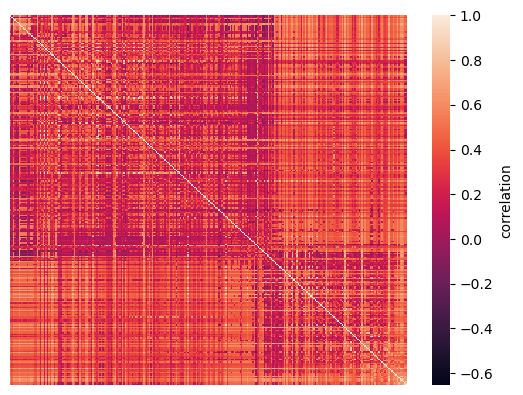

<Axes: >

In [8]:
mo_basic7.plot_data(xticklabels=False, yticklabels=False)

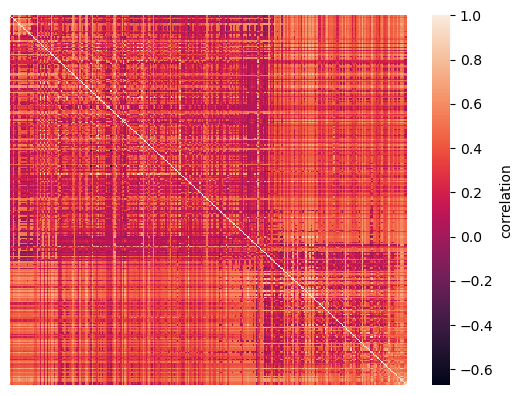

<Axes: >

In [9]:
mo_noisy14.plot_data(xticklabels=False, yticklabels=False)

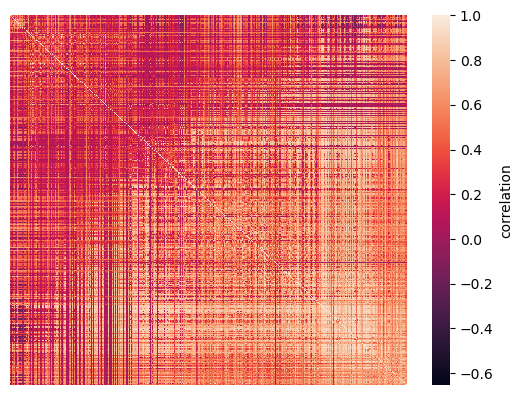

<Axes: >

In [10]:
mo_basic14.plot_data(xticklabels=False, yticklabels=False)

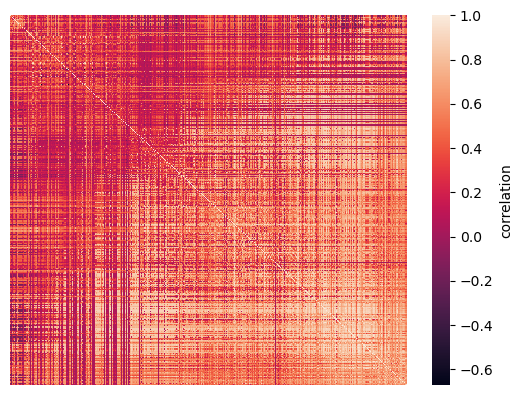

<Axes: >

In [11]:
mo_all21.plot_data(xticklabels=False, yticklabels=False)

### Model analysis - leave one out

gotta somehow compare the model prediction at each location to the observation

In [ ]:
# read in the data
# create brain objects
#     each brain must have one electrode left out
# create models from brains
#     each model must leave out one brain
#     this model will be used to predict the left out electrodes